In [30]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

## Lecture 16: Decisions and Uncertainty ##

In [31]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [32]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [33]:
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [34]:
observed_average = 13.6667

In [35]:
random_sample = scores.sample(27, with_replacement = False)
random_sample

Section,Midterm
9,16
5,12
10,11
10,12
2,24
2,11
4,22
8,22
5,15
4,13


In [36]:
np.average(random_sample.column('Midterm'))

15.703703703703704

In [37]:
random_sample = scores.sample(27, with_replacement = False)
np.average(random_sample.column('Midterm'))

14.25925925925926

In [38]:
averages = make_array()

for i in np.arange(50000):
    random_sample = scores.sample(27, with_replacement = False)
    new_average = np.average(random_sample.column('Midterm'))
    averages = np.append(averages, new_average)    

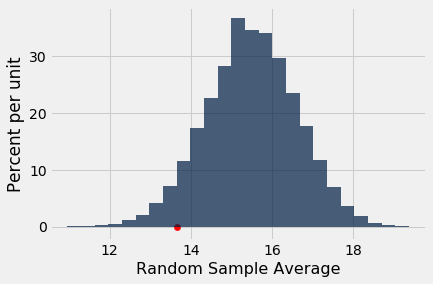

In [17]:
Table().with_column('Random Sample Average', averages).hist(bins = 25)
plots.scatter(observed_average, 0, color = 'red', s=40);

In [18]:
sum(averages <= observed_average) / 50000

0.05604

In [19]:
np.count_nonzero(averages <= observed_average) / 50000

0.05604

In [29]:
np.count_nonzero(averages <= 13.6) / 50000

0.0491

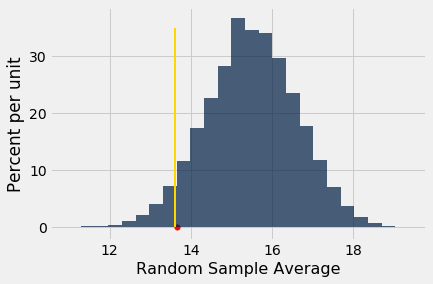

In [21]:
Table().with_column('Random Sample Average', averages).hist(bins = 25)
plots.scatter(observed_average, 0, color='red', s=30)
plots.plot([13.6, 13.6], [0, 0.35], color='gold', lw=2);